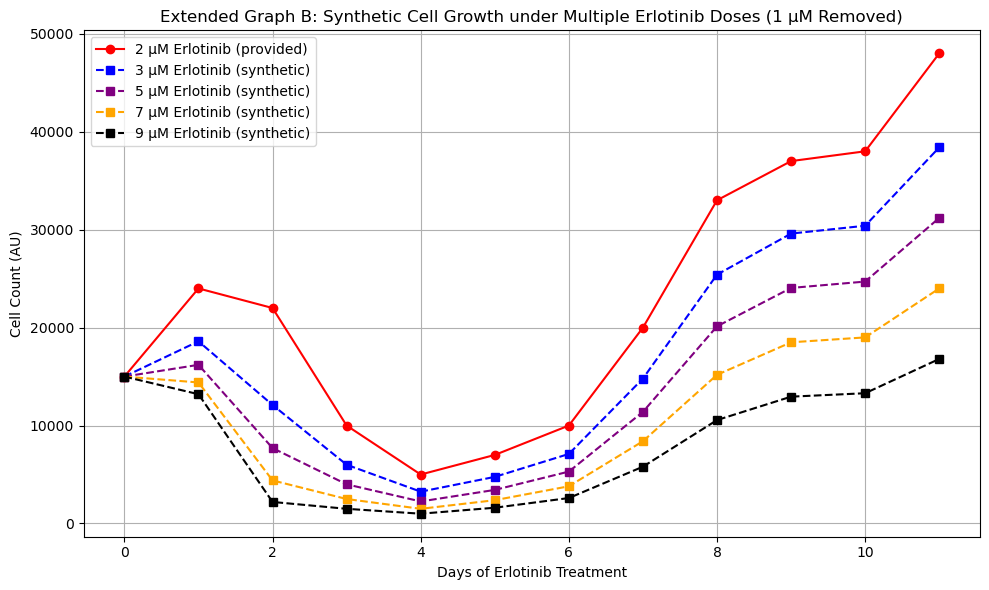

Updated plot (without 1 μM) saved as 'synthetic_erlotinib_dose_response_updated.png' and data saved as 'synthetic_erlotinib_dose_response_updated.csv'.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Provided Erlotinib (2 μM) cell counts
days = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
cell_counts_2uM = np.array([15000, 24000, 22000, 10000, 5000, 7000, 10000, 20000, 33000, 37000, 38000, 48000])

# Approximate survival % at D0, D2, D4, D9, D11 for each concentration
survival_reference = {
    3:  [100, 55, 65, 80, 80],
    5:  [100, 35, 45, 65, 65],
    7:  [100, 20, 30, 50, 50],
    9:  [100, 10, 20, 35, 35]
}

# Reference day indices for interpolation
ref_days = np.array([0, 2, 4, 9, 11])

# Linear interpolation function
def interpolate_survival(ref_days, ref_values):
    all_days = np.arange(12)
    return np.interp(all_days, ref_days, ref_values)

# Compute synthetic cell counts
synthetic_curves = {}
for conc in [3, 5, 7, 9]:
    survival_percent = interpolate_survival(ref_days, survival_reference[conc])
    synthetic_counts = cell_counts_2uM * (survival_percent / 100)
    synthetic_curves[conc] = synthetic_counts

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(days, cell_counts_2uM, 'o-', color='red', label='2 μM Erlotinib (provided)')

# Colors for each concentration
colors = {3: 'blue', 5: 'purple', 7: 'orange', 9: 'black'}

# Plot each synthetic curve
for conc in [3, 5, 7, 9]:
    plt.plot(days, synthetic_curves[conc], 's--', color=colors[conc], label=f'{conc} μM Erlotinib (synthetic)')

plt.xlabel("Days of Erlotinib Treatment")
plt.ylabel("Cell Count (AU)")
plt.title("Extended Graph B: Synthetic Cell Growth under Multiple Erlotinib Doses (1 μM Removed)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save high-resolution image
plt.savefig("synthetic_erlotinib_dose_response_updated.png", dpi=300)

# Display the plot
plt.show()

# Save CSV for modeling pipeline
df = pd.DataFrame({
    'Day': days,
    '2uM': cell_counts_2uM,
    '3uM': synthetic_curves[3],
    '5uM': synthetic_curves[5],
    '7uM': synthetic_curves[7],
    '9uM': synthetic_curves[9],
})
df.to_csv("synthetic_erlotinib_dose_response_updated.csv", index=False)

print("Updated plot (without 1 μM) saved as 'synthetic_erlotinib_dose_response_updated.png' and data saved as 'synthetic_erlotinib_dose_response_updated.csv'.")



2uM Erlotinib:
Linear fit slope (a): 7085.71 AU/day
Logistic fit r: 0.916, K: 45784, t0: 7.26

3uM Erlotinib:
Linear fit slope (a): 6085.71 AU/day
Logistic fit r: 0.897, K: 37975, t0: 7.48

5uM Erlotinib:
Linear fit slope (a): 5028.57 AU/day
Logistic fit r: 0.991, K: 29853, t0: 7.50

7uM Erlotinib:
Linear fit slope (a): 4028.57 AU/day
Logistic fit r: 1.016, K: 22934, t0: 7.60

9uM Erlotinib:
Linear fit slope (a): 2957.14 AU/day
Logistic fit r: 1.040, K: 16423, t0: 7.73


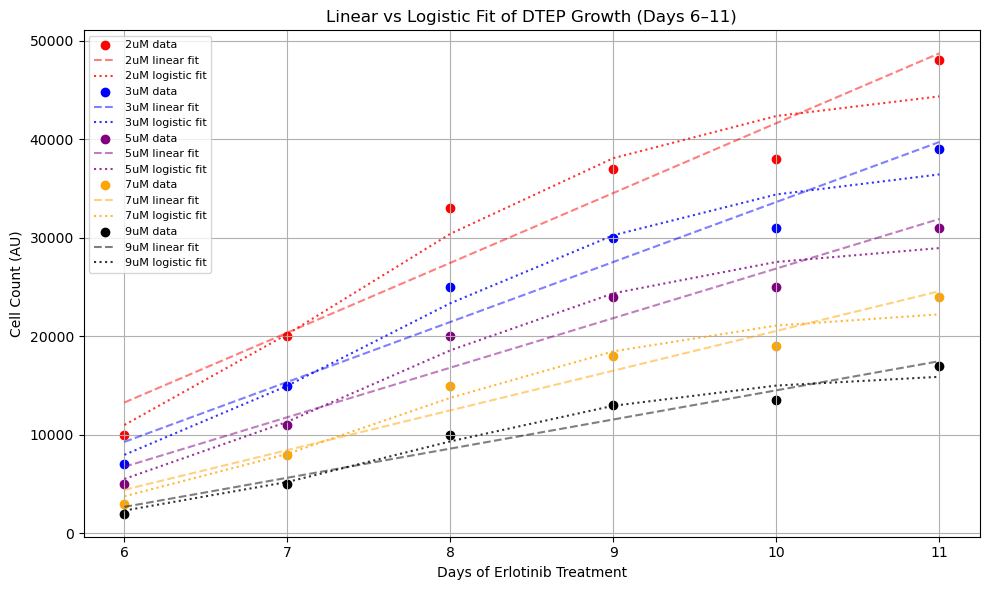

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data for Days 6-11 from your Graph B
days_fit = np.array([6, 7, 8, 9, 10, 11])

# Example synthetic counts (replace with your extracted data for accuracy)
data = {
    '2uM': np.array([10000, 20000, 33000, 37000, 38000, 48000]),
    '3uM': np.array([7000, 15000, 25000, 30000, 31000, 39000]),
    '5uM': np.array([5000, 11000, 20000, 24000, 25000, 31000]),
    '7uM': np.array([3000, 8000, 15000, 18000, 19000, 24000]),
    '9uM': np.array([2000, 5000, 10000, 13000, 13500, 17000]),
}

# Linear fit function
def linear(t, a, b):
    return a * t + b

# Logistic (sigmoid) fit function
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

colors = {'2uM': 'red', '3uM': 'blue', '5uM': 'purple', '7uM': 'orange', '9uM': 'black'}

plt.figure(figsize=(10, 6))

for conc in data:
    y_data = data[conc]
    
    # Linear Fit
    popt_lin, _ = curve_fit(linear, days_fit, y_data)
    y_lin_fit = linear(days_fit, *popt_lin)
    
    # Logistic Fit (initial guesses: K=max, r=0.5, t0=8)
    popt_log, _ = curve_fit(logistic, days_fit, y_data, p0=[max(y_data), 0.5, 8])
    y_log_fit = logistic(days_fit, *popt_log)
    
    # Plot
    plt.scatter(days_fit, y_data, color=colors[conc], label=f'{conc} data')
    plt.plot(days_fit, y_lin_fit, '--', color=colors[conc], alpha=0.5, label=f'{conc} linear fit')
    plt.plot(days_fit, y_log_fit, ':', color=colors[conc], alpha=0.8, label=f'{conc} logistic fit')
    
    # Print growth rates
    print(f"\n{conc} Erlotinib:")
    print(f"Linear fit slope (a): {popt_lin[0]:.2f} AU/day")
    print(f"Logistic fit r: {popt_log[1]:.3f}, K: {popt_log[0]:.0f}, t0: {popt_log[2]:.2f}")

plt.xlabel("Days of Erlotinib Treatment")
plt.ylabel("Cell Count (AU)")
plt.title("Linear vs Logistic Fit of DTEP Growth (Days 6–11)")
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

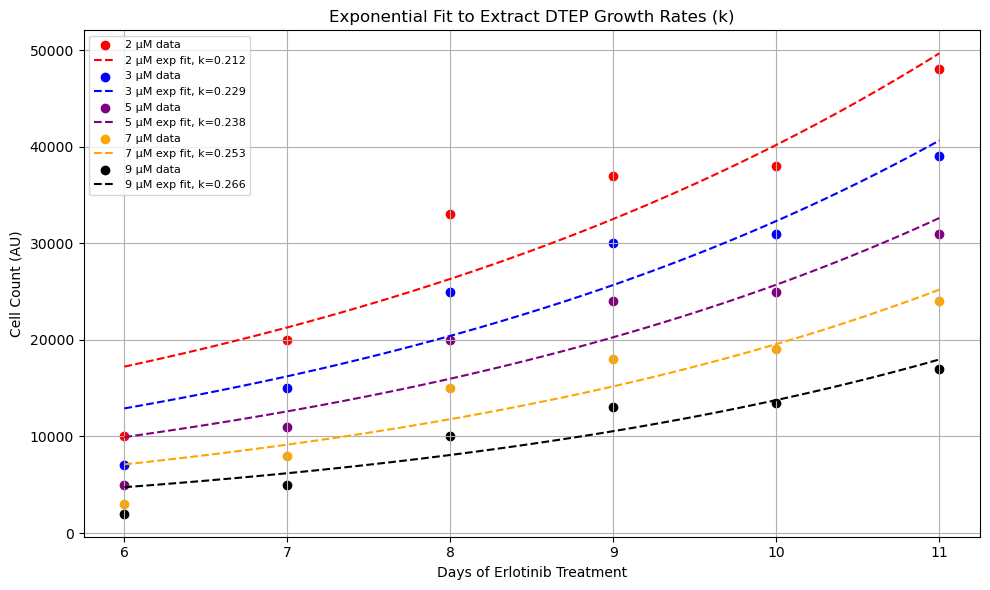

2 μM: k = 7600.00 AU/day
3 μM: k = 6400.00 AU/day
5 μM: k = 5200.00 AU/day
7 μM: k = 4200.00 AU/day
9 μM: k = 3000.00 AU/day


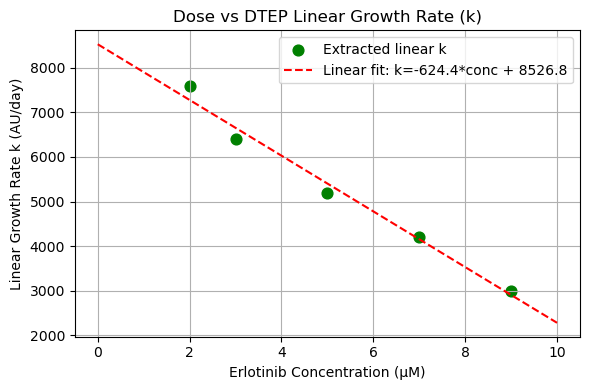

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data: Day 6 (N0) and Day 11 (Nt) cell counts from your extended Graph B
data = {
    2: np.array([10000, 20000, 33000, 37000, 38000, 48000]),
    3: np.array([7000, 15000, 25000, 30000, 31000, 39000]),
    5: np.array([5000, 11000, 20000, 24000, 25000, 31000]),
    7: np.array([3000, 8000, 15000, 18000, 19000, 24000]),
    9: np.array([2000, 5000, 10000, 13000, 13500, 17000])
}

# Exponential model
def exp_func(t, A, k):
    return A * np.exp(k * t)

k_values = []
concs = []

plt.figure(figsize=(10, 6))

colors = {2: 'red', 3: 'blue', 5: 'purple', 7: 'orange', 9: 'black'}

for conc, counts in data.items():
    popt, _ = curve_fit(exp_func, days, counts, p0=[counts[0], 0.1])
    A_fit, k_fit = popt
    k_values.append(k_fit)
    concs.append(conc)

    # Plot fit
    t_fit = np.linspace(6, 11, 100)
    plt.scatter(days, counts, color=colors[conc], label=f'{conc} μM data')
    plt.plot(t_fit, exp_func(t_fit, *popt), '--', color=colors[conc], label=f'{conc} μM exp fit, k={k_fit:.3f}')

plt.xlabel("Days of Erlotinib Treatment")
plt.ylabel("Cell Count (AU)")
plt.title("Exponential Fit to Extract DTEP Growth Rates (k)")
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

k_values = []
concs = []

for conc, counts in data.items():
    N0 = counts[0]    # Day 6
    Nt = counts[-1]   # Day 11
    delta_t = 5       # days (Day 6 to Day 11)
    k_lin = (Nt - N0) / delta_t
    k_values.append(k_lin)
    concs.append(conc)
    print(f"{conc} μM: k = {k_lin:.2f} AU/day")

# Plot: Dose vs Linear Growth Rate
concs = np.array(concs)
k_values = np.array(k_values)

plt.figure(figsize=(6,4))
plt.scatter(concs, k_values, color='green', s=60, label='Extracted linear k')

# Fit linear relationship: k = m * conc + c
def linear_func(x, m, c):
    return m * x + c

popt_lin, _ = curve_fit(linear_func, concs, k_values)
x_fit = np.linspace(0, 10, 100)
plt.plot(x_fit, linear_func(x_fit, *popt_lin), 'r--',
         label=f'Linear fit: k={popt_lin[0]:.1f}*conc + {popt_lin[1]:.1f}')

plt.xlabel("Erlotinib Concentration (μM)")
plt.ylabel("Linear Growth Rate k (AU/day)")
plt.title("Dose vs DTEP Linear Growth Rate (k)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()